# Antes de entrarmos nos modelos iremos estudar as principais métricas de avaliação. Vejamos no tutorial como elas são.

# Classificação - Algoritmos Rasos
* A classificação é um método de aprendizagem supervisionada (supervised learning) para atribuir um rótulo a uma amostra com base nos atributos;
* A biblioteca sklearn implementa diversos modelos úteis e comuns;
* Veremos também alguns modelos que não estão no sklearn.

## Regressão Logística
* A regressão logística estima probabilidades usando uma função logística;
* Esse tem sido o modelo de classificação padrão para a maioria das ciências.

<img src="regressao_logistica.png" width="400px" align="left"><br>

In [74]:
#Vou importar todos os modelos de classificação padrão do sklearn
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
import matplotlib.pyplot as plt
from yellowbrick.classifier import  ROCAUC

In [75]:
#Carregar os dados
df = pd.read_csv('titanic3_prep_proce_final.csv', delimiter = ',')

In [76]:
df.head()

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
0,1,1,24.0000,0,0,14.4542,1,0,0,0,1
1,1,1,0.9167,1,2,14.4542,0,1,0,0,1
2,1,1,24.0000,0,0,26.5500,0,1,0,0,1
3,1,1,24.0000,1,0,77.9583,1,0,0,0,1
4,1,1,24.0000,2,0,51.4792,1,0,0,0,1


In [77]:
#Deletar o passenger_id
#df.drop('passenger_id',axis = 1,inplace = True)

In [78]:
#df.head()

In [79]:
#Vamos ver se continuam balanceados
df.sobreviveu.value_counts() 

1    500
0    500
Name: sobreviveu, dtype: int64

In [80]:
#Vamos separar a classe da variável
X = df.drop(['sobreviveu'], axis=1)
y = df['sobreviveu']

Não sobreviveu:  500
Sobreviveu :  500


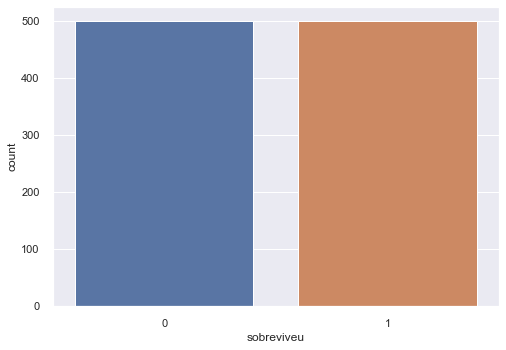

In [81]:
#Rever a distruição das amostras entre as classes
sns.set(style="darkgrid")
ax = sns.countplot(x = y)      
N, S = y.value_counts(sort=True) 
print('Não sobreviveu: ',N)
print('Sobreviveu : ',S)

### Normalização Min-Max (Pré-Processamento)

In [82]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [83]:
X

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
0,0.0,1.000000,0.000,0.000000,0.106568,1.0,0.0,0.0,0.0,1.0
1,0.0,0.031469,0.125,0.222222,0.106568,0.0,1.0,0.0,0.0,1.0
2,0.0,1.000000,0.000,0.000000,0.195748,0.0,1.0,0.0,0.0,1.0
3,0.0,1.000000,0.125,0.000000,0.574773,1.0,0.0,0.0,0.0,1.0
4,0.0,1.000000,0.250,0.000000,0.379547,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,1.0,1.000000,0.000,0.000000,0.056955,0.0,1.0,0.0,1.0,0.0
996,1.0,1.000000,0.125,0.222222,0.172893,1.0,0.0,0.0,0.0,1.0
997,0.0,1.000000,0.125,0.000000,0.437946,0.0,1.0,1.0,0.0,0.0
998,0.5,1.000000,0.125,0.000000,0.084787,0.0,1.0,0.0,0.0,1.0


### Normalização StandardScaler ou Z-Score(Pré-Processamento)

In [84]:
X = df.drop(['sobreviveu'], axis=1)
X

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
0,1,24.0000,0,0,14.4542,1,0,0,0,1
1,1,0.9167,1,2,14.4542,0,1,0,0,1
2,1,24.0000,0,0,26.5500,0,1,0,0,1
3,1,24.0000,1,0,77.9583,1,0,0,0,1
4,1,24.0000,2,0,51.4792,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,3,24.0000,0,0,7.7250,0,1,0,1,0
996,3,24.0000,1,2,23.4500,1,0,0,0,1
997,1,24.0000,1,0,59.4000,0,1,1,0,0
998,2,24.0000,1,0,11.5000,0,1,0,0,1


In [85]:
from sklearn.preprocessing import StandardScaler
# create a scaler object
scaler = StandardScaler()
# fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [86]:
X

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
0,-1.425645,0.166535,-0.508134,-0.464067,-0.432706,1.170328,-1.170328,-0.534179,-0.335182,0.690728
1,-1.425645,-6.047956,0.528874,1.844725,-0.432706,-0.854461,0.854461,-0.534179,-0.335182,0.690728
2,-1.425645,0.166535,-0.508134,-0.464067,0.029561,-0.854461,0.854461,-0.534179,-0.335182,0.690728
3,-1.425645,0.166535,0.528874,-0.464067,1.994240,1.170328,-1.170328,-0.534179,-0.335182,0.690728
4,-1.425645,0.166535,1.565881,-0.464067,0.982284,1.170328,-1.170328,-0.534179,-0.335182,0.690728
...,...,...,...,...,...,...,...,...,...,...
995,0.907653,0.166535,-0.508134,-0.464067,-0.689877,-0.854461,0.854461,-0.534179,2.983453,-1.447748
996,0.907653,0.166535,0.528874,1.844725,-0.088912,1.170328,-1.170328,-0.534179,-0.335182,0.690728
997,-1.425645,0.166535,0.528874,-0.464067,1.284995,-0.854461,0.854461,1.872032,-0.335182,-1.447748
998,-0.258996,0.166535,0.528874,-0.464067,-0.545607,-0.854461,0.854461,-0.534179,-0.335182,0.690728


In [87]:
#Vamos separar em treino e teste
#Obs: random_state deixa os valores aleatírios dentro de um range
#Eu posso usar 3,5,6, qualquer número inteiro que dentro de um range eu pego um sequencia de valores
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [88]:
print(len(X_treino))
print(len(X_teste))

700
300


In [89]:
#Vamos instanciar
lr = LogisticRegression(random_state=42)

In [90]:
#Treinar
lr.fit(X_treino, y_treino)

LogisticRegression(random_state=42)

In [91]:
lr.score(X_teste, y_teste)

0.8

In [92]:
#A seguir, apresentamos algumas das características que incluiremos em cada modelo:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                        intercept_scaling=1, max_iter=100, multi_class='ovr', 
                        n_jobs=1, penalty='l2', random_state=42, solver='liblinear', 
                        tol=0.0001, verbose=0, warm_start=False)

In [93]:
lr.fit(X_treino, y_treino)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=42,
                   solver='liblinear')

In [94]:
lr.score(X_teste, y_teste)

0.8

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
cv_scores = cross_val_score(lr,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.82 0.83 0.79 0.82 0.83 0.8  0.7  0.67 0.6  0.72]
Média dos Scores = 0.7579999999999999


In [97]:
#Obter a previsões
lr_previsoes = lr.predict(X_teste)
lr_previsoes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], d

In [98]:
# Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
lr_previsoes_prob = lr.predict_proba(X_teste)
lr_previsoes_prob

array([[0.58534937, 0.41465063],
       [0.73811596, 0.26188404],
       [0.73811596, 0.26188404],
       [0.78093199, 0.21906801],
       [0.73072055, 0.26927945],
       [0.64034965, 0.35965035],
       [0.56854408, 0.43145592],
       [0.23365274, 0.76634726],
       [0.25340051, 0.74659949],
       [0.0330856 , 0.9669144 ],
       [0.25340051, 0.74659949],
       [0.32357465, 0.67642535],
       [0.94616696, 0.05383304],
       [0.82846384, 0.17153616],
       [0.76146531, 0.23853469],
       [0.82840063, 0.17159937],
       [0.19839099, 0.80160901],
       [0.82715367, 0.17284633],
       [0.25565086, 0.74434914],
       [0.37385065, 0.62614935],
       [0.78300573, 0.21699427],
       [0.09948226, 0.90051774],
       [0.8298708 , 0.1701292 ],
       [0.73811596, 0.26188404],
       [0.20468311, 0.79531689],
       [0.23710562, 0.76289438],
       [0.29263779, 0.70736221],
       [0.73811596, 0.26188404],
       [0.82715367, 0.17284633],
       [0.89810205, 0.10189795],
       [0.

### Matriz de Confusão 

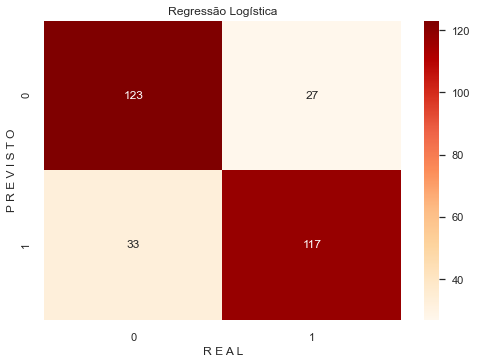

In [99]:
sns.heatmap(confusion_matrix(y_teste, lr_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [100]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,lr_previsoes)
precisao = precision_score(y_teste,lr_previsoes)
recall = recall_score(y_teste,lr_previsoes)
f1Score = f1_score(y_teste,lr_previsoes)
lr_curva_roc = roc_auc_score(y_teste,lr_previsoes)
kappa = cohen_kappa_score(y_teste,lr_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}')

Acurácia:0.8
Precisão:0.81
Recall ou Sensibilidade:0.78
F1-Score:0.8
Kappa:0.6
Curva ROC:0.8


In [101]:
print(classification_report(y_teste, lr.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       150
           1       0.81      0.78      0.80       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



### Curva ROC 

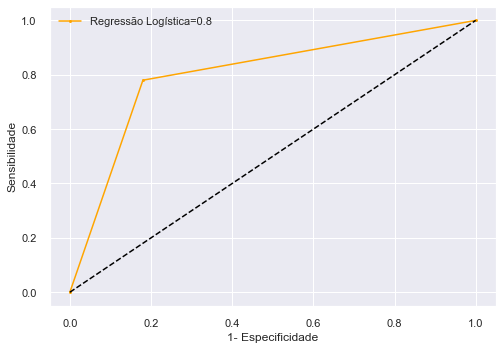

In [102]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

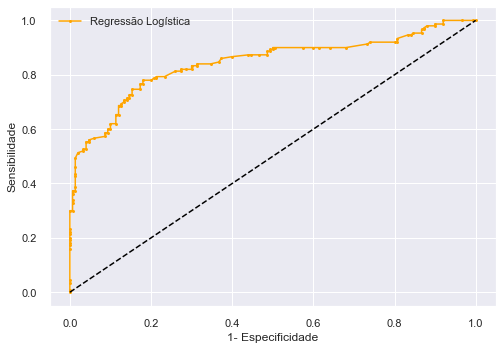

In [103]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [104]:
X_teste

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
521,-1.425645,0.166535,-0.508134,-0.464067,0.008542,-0.854461,0.854461,-0.534179,-0.335182,0.690728
737,-0.258996,0.166535,-0.508134,-0.464067,-0.583824,-0.854461,0.854461,-0.534179,-0.335182,0.690728
740,-0.258996,0.166535,-0.508134,-0.464067,-0.583824,-0.854461,0.854461,-0.534179,-0.335182,0.690728
660,0.907653,0.166535,0.528874,-0.464067,-0.739081,-0.854461,0.854461,1.872032,-0.335182,-1.447748
411,0.907653,0.166535,-0.508134,-0.464067,1.174004,-0.854461,0.854461,-0.534179,-0.335182,0.690728
...,...,...,...,...,...,...,...,...,...,...
468,0.907653,0.166535,-0.508134,-0.464067,-0.677456,-0.854461,0.854461,-0.534179,-0.335182,0.690728
935,0.907653,0.166535,-0.508134,-0.464067,-0.683349,-0.854461,0.854461,-0.534179,-0.335182,0.690728
428,0.907653,0.166535,-0.508134,-0.464067,-0.683984,1.170328,-1.170328,-0.534179,2.983453,-1.447748
7,-1.425645,0.166535,-0.508134,-0.464067,2.028318,1.170328,-1.170328,-0.534179,-0.335182,0.690728


In [105]:
lr_previsoes_1 = lr.predict(X_teste[:1])
lr_previsoes_1

array([0], dtype=int64)

In [106]:
lr_previsoes_1 = lr.predict_proba(X_teste[:1])
lr_previsoes_1

array([[0.58534937, 0.41465063]])

## Naive Bayes

* O Naive Bayes é um classificador probabilístico que pressupõe uma independência entre os atributos dos dados; 
* É popular para aplicações de classificação de textos, por exemplo, para identificação de spams; 
* A vantagem desse modelo é que, por supor uma independência entre os atributos, ele é capaz de fazer o treinamento de um modelo com um número pequeno de amostras;
* A desvantagem é que o modelo não conseguirá capturar as interações entre os atributos;
* Há três classes no sklearn: GaussianNB, MultinomialNB e BernoulliNB. 
    - A primeira supõe uma distribuição gaussiana (atributos contínuos com uma distribuição normal);
    - A segunda é para contadores de ocorrência discretos; 
    - A terceira, para atributos booleanos discretos.

In [107]:
#Importar
from sklearn.naive_bayes import GaussianNB

In [108]:
#Vamos instanciar
nb = GaussianNB()

In [109]:
#Treinar
nb.fit(X_treino, y_treino)

GaussianNB()

In [110]:
nb.score(X_teste, y_teste)

0.7866666666666666

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [111]:
cv_scores = cross_val_score(nb,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.83 0.84 0.8  0.83 0.85 0.77 0.7  0.67 0.51 0.73]
Média dos Scores = 0.7529999999999999


In [112]:
#Obter a previsões
nb_previsoes = nb.predict(X_teste)
nb_previsoes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], d

In [113]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
nb_previsoes_prob = nb.predict_proba(X_teste)
nb_previsoes_prob

array([[9.07832747e-01, 9.21672527e-02],
       [9.71087535e-01, 2.89124651e-02],
       [9.71087535e-01, 2.89124651e-02],
       [8.41042364e-01, 1.58957636e-01],
       [9.32293455e-01, 6.77065448e-02],
       [7.38053618e-01, 2.61946382e-01],
       [4.72340724e-01, 5.27659276e-01],
       [1.26334244e-02, 9.87366576e-01],
       [2.68984572e-02, 9.73101543e-01],
       [1.42785045e-06, 9.99998572e-01],
       [2.68984572e-02, 9.73101543e-01],
       [8.79554773e-01, 1.20445227e-01],
       [9.99999997e-01, 3.37269493e-09],
       [9.84071693e-01, 1.59283068e-02],
       [9.68994003e-01, 3.10059970e-02],
       [9.84073540e-01, 1.59264600e-02],
       [5.77122148e-02, 9.42287785e-01],
       [9.84103554e-01, 1.58964459e-02],
       [2.67923545e-02, 9.73207645e-01],
       [1.25098970e-01, 8.74901030e-01],
       [9.19305257e-01, 8.06947428e-02],
       [2.41794831e-03, 9.97582052e-01],
       [9.84022325e-01, 1.59776745e-02],
       [9.71087535e-01, 2.89124651e-02],
       [7.496373

### Matriz de Confusão 

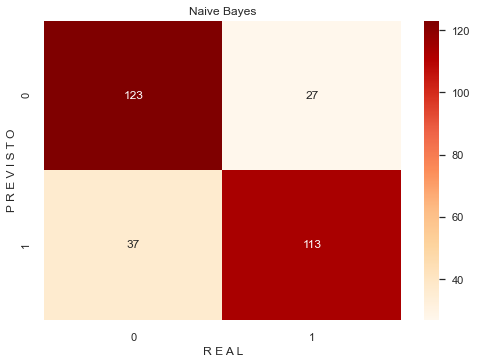

In [114]:
sns.heatmap(confusion_matrix(y_teste, nb_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Naive Bayes')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [115]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,nb_previsoes)
precisao = precision_score(y_teste,nb_previsoes)
recall = recall_score(y_teste,nb_previsoes)
f1Score = f1_score(y_teste,nb_previsoes)
nb_curva_roc = roc_auc_score(y_teste,nb_previsoes)
kappa = cohen_kappa_score(y_teste,nb_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(nb_curva_roc,2)}')

Acurácia:0.79
Precisão:0.81
Recall ou Sensibilidade:0.75
F1-Score:0.78
Kappa:0.57
Curva ROC:0.79


In [116]:
print(classification_report(y_teste, nb.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       150
           1       0.81      0.75      0.78       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



### Curva ROC

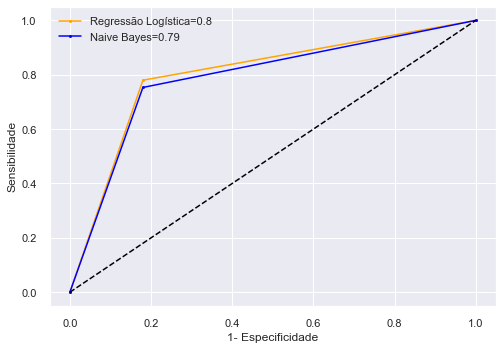

In [117]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_previsoes)
nb_fp,nb_vp,lim2 = roc_curve(y_teste,nb_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot(nb_fp,nb_vp, marker='.', label='Naive Bayes='+str(round(nb_curva_roc,2)),color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

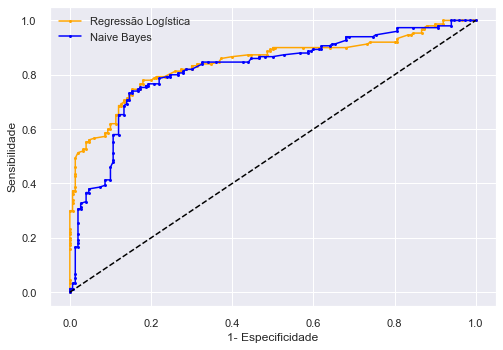

In [118]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
nb_probs = nb_previsoes_prob[:,1]

rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
nb_fp,nb_vp,lim2 = roc_curve(y_teste,nb_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot(nb_fp,nb_vp, marker='.', label='Naive Bayes',color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [119]:
nb_previsoes_1 = nb.predict(X_teste[:1])
nb_previsoes_1

array([0], dtype=int64)

In [120]:
nb_previsoes_1 = nb.predict_proba(X_teste[:1])
nb_previsoes_1

array([[0.90783275, 0.09216725]])

## Máquina de vetores suporte
* Uma SVM (Support Vector Machine, ou Máquina de Vetores Suporte) é um algoritmo que tenta fazer a adequação de uma linha (ou plano ou hiperplano) entre as diferentes classes de modo a maximizar a distância da linha até os pontos das classes;
* Dessa maneira, ela tenta encontrar uma separação robusta entre as classes;
* Os vetores suporte (support vectors) são os pontos da fronteira do hiperplano divisor.

Acessar o endereço: https://scikit-learn.org/stable/modules/svm.html

<img src="SVM.png" width="400px" align="left"><br>

In [121]:
from sklearn.svm import SVC

In [122]:
svc = SVC(random_state=42, probability=True)

In [123]:
svc.fit(X_treino, y_treino)

SVC(probability=True, random_state=42)

In [124]:
svc.score(X_teste, y_teste)

0.7866666666666666

In [125]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', 
          degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=42, 
          shrinking=True, tol=0.001, verbose=False)

In [126]:
svc.fit(X_treino, y_treino)

SVC(gamma='auto', probability=True, random_state=42)

In [127]:
svc.score(X_teste, y_teste) 

0.7866666666666666

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [128]:
cv_scores = cross_val_score(svc,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.79 0.78 0.79 0.78 0.85 0.84 0.7  0.69 0.66 0.75]
Média dos Scores = 0.7630000000000001


In [129]:
#Obter a previsões
svc_previsoes = svc.predict(X_teste)
svc_previsoes

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], d

In [130]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
svc_previsoes_prob = svc.predict_proba(X_teste)
svc_previsoes_prob

array([[0.73830331, 0.26169669],
       [0.76356922, 0.23643078],
       [0.76356922, 0.23643078],
       [0.77187794, 0.22812206],
       [0.70512963, 0.29487037],
       [0.38839012, 0.61160988],
       [0.56101918, 0.43898082],
       [0.21231325, 0.78768675],
       [0.19359679, 0.80640321],
       [0.14641654, 0.85358346],
       [0.19359679, 0.80640321],
       [0.19364192, 0.80635808],
       [0.76343598, 0.23656402],
       [0.76357787, 0.23642213],
       [0.76351673, 0.23648327],
       [0.76356147, 0.23643853],
       [0.14806838, 0.85193162],
       [0.76322713, 0.23677287],
       [0.19434379, 0.80565621],
       [0.2346771 , 0.7653229 ],
       [0.76346615, 0.23653385],
       [0.16099077, 0.83900923],
       [0.76392864, 0.23607136],
       [0.76356922, 0.23643078],
       [0.19228987, 0.80771013],
       [0.14553364, 0.85446636],
       [0.72384334, 0.27615666],
       [0.76356922, 0.23643078],
       [0.76322713, 0.23677287],
       [0.76334556, 0.23665444],
       [0.

### Matriz de Confusão

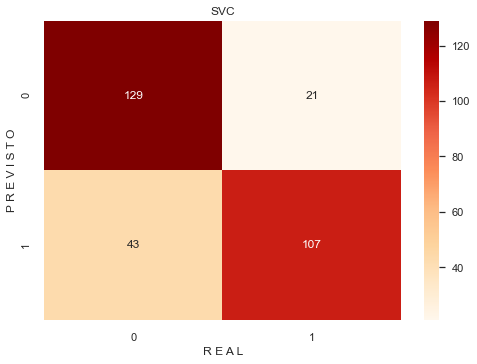

In [131]:
sns.heatmap(confusion_matrix(y_teste, svc_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [132]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,svc_previsoes)
precisao = precision_score(y_teste,svc_previsoes)
recall = recall_score(y_teste,svc_previsoes)
f1Score = f1_score(y_teste,svc_previsoes)
svc_curva_roc = roc_auc_score(y_teste,svc_previsoes)
kappa = cohen_kappa_score(y_teste,svc_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(svc_curva_roc,2)}')

Acurácia:0.79
Precisão:0.84
Recall ou Sensibilidade:0.71
F1-Score:0.77
Kappa:0.57
Curva ROC:0.79


In [133]:
print(classification_report(y_teste, svc.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.84      0.71      0.77       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



### Curva ROC

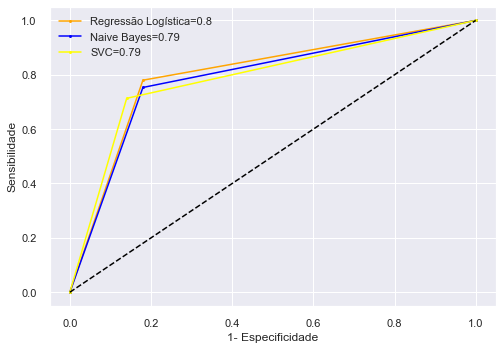

In [134]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_previsoes)
nb_fp,nb_vp,lim2 = roc_curve(y_teste,nb_previsoes)
svc_fp,svc_vp,lim3 = roc_curve(y_teste,svc_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot(nb_fp,nb_vp, marker='.', label='Naive Bayes='+str(round(nb_curva_roc,2)),color="blue")
plt.plot(svc_fp,svc_vp, marker='.', label='SVC='+str(round(svc_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

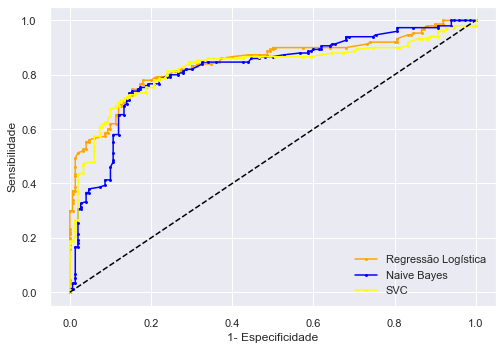

In [135]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
nb_probs = nb_previsoes_prob[:,1]
svc_probs = svc_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
nb_fp,nb_vp,lim2 = roc_curve(y_teste,nb_probs)
svc_fp,svc_vp,lim3 = roc_curve(y_teste,svc_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot(nb_fp,nb_vp, marker='.', label='Naive Bayes',color="blue")
plt.plot(svc_fp,svc_vp, marker='.', label='SVC',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [136]:
svc_previsoes_1 = svc.predict(X_teste[:1])
svc_previsoes_1

array([0], dtype=int64)

In [137]:
svc_previsoes_1 = svc.predict_proba(X_teste[:1])
svc_previsoes_1

array([[0.73830331, 0.26169669]])

### Referências

### Harrison, Matt. Machine Learning – Guia de Referência Rápida. Novatec Editora. Edição do Kindle. 
### Regressão Logística. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Acesso em 05/10/2022.
### GaussianNB. Disponível em:https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB .Acesso em 05/10/2022.
### SVC. Disponível em:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC. Acesso em 10/10/2022.
### Yellowbrick. Disponível em: https://www.scikit-yb.org/en/latest/. Acesso em 05/10/2022.